In [1]:
import pandas as pd
import numpy as np

## Libraries for plotting

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

##  load dataset  (dataset comes with Scikit Learn)

## Sklearn contain many datasets, feel free to choose whatever you want to interact with

In [3]:
from sklearn.datasets import load_boston

## libraries for Q-Q Plots

In [4]:
import pylab
import scipy.stats as stats

In [5]:
# load data 
dataset_of_boston = load_boston()


In [6]:

# load independent values using pandas dataframe
boston = pd.DataFrame(dataset_of_boston.data,
                      columns=dataset_of_boston.feature_names)

# target value
boston['MEDV'] = dataset_of_boston.target

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# load independent values in a list
features = dataset_of_boston.feature_names
features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
print(dataset_of_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Simulation data for the examples

In [9]:
np.random.seed(20)

n = 200
x = np.random.randn(n)
y = x * 10 + np.random.randn(n) * 2

toy_df = pd.DataFrame([x, y]).T
toy_df.columns = ['x', 'y']
toy_df.head()

,x,y
0,0.883893,5.830975
1,0.195865,4.586586
2,0.357537,3.515113
3,-2.343262,-22.162593
4,-1.084833,-9.843455


## Linear Assumption

Evaluation for linear assumption with scatter plots and residual plots. Scatter plots plot the change in the dependent variable y with the independent variable x.

### Scatter plots

Text(0.5, 6.79999999999999, 'Independent variable')

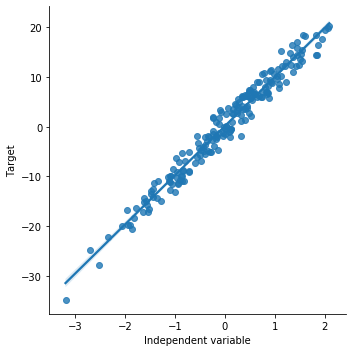

In [10]:
sns.lmplot(x="x", y="y", data=toy_df, order=1)


plt.ylabel('Target')
plt.xlabel('Independent variable')

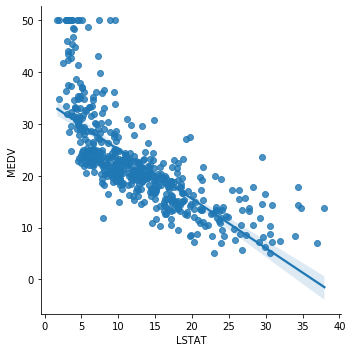

In [11]:
sns.lmplot(x="LSTAT", y="MEDV", data=boston, order=1)

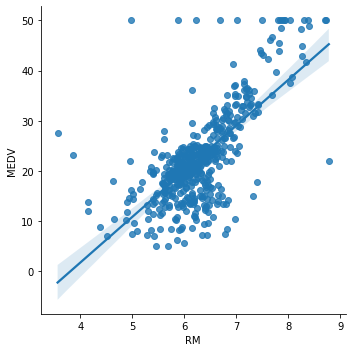

In [12]:
sns.lmplot(x="RM", y="MEDV", data=boston, order=1)

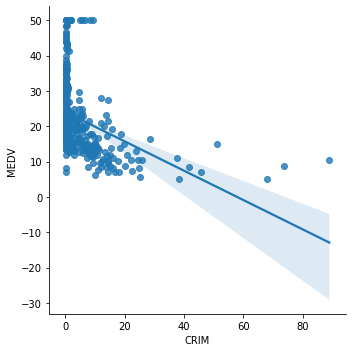

In [13]:
sns.lmplot(x="CRIM", y="MEDV", data=boston, order=1)

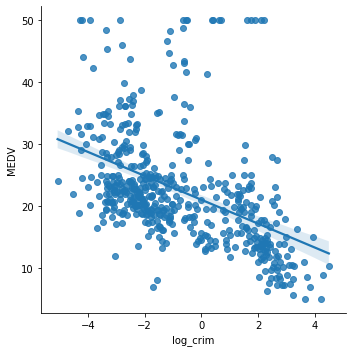

In [14]:
boston['log_crim'] = np.log(boston['CRIM'])

sns.lmplot(x="log_crim", y="MEDV", data=boston, order=1)

In [15]:
boston.drop(labels='log_crim', inplace=True, axis=1)

## Add linear model

In [16]:
# linear regression
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Evaluate the regression model
from sklearn.metrics import mean_squared_error

In [17]:
linreg = LinearRegression()

Text(0, 0.5, 'Real value')

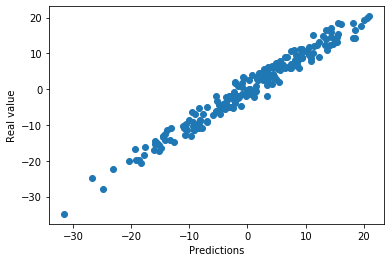

In [18]:
# model Fitting
linreg.fit(toy_df['x'].to_frame(), toy_df['y'])

# make the prediction
pred = linreg.predict(toy_df['x'].to_frame())

# Calculating the residuals
error = toy_df['y'] - pred

# plot Predicted and  real
plt.scatter(x=pred, y=toy_df['y'])
plt.xlabel('Predictions')
plt.ylabel('Real value')

Text(0.5, 0, 'Independent variable x')

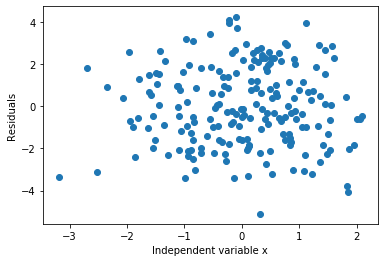

In [19]:
plt.scatter(y=error, x=toy_df['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')

Text(0.5, 0, 'Residuals')

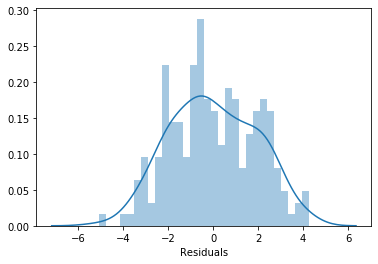

In [20]:
sns.distplot(error, bins=30)
plt.xlabel('Residuals')

In [21]:
# call the linear model from sklearn
linreg = LinearRegression()

In [22]:
# model fitting
linreg.fit(boston['LSTAT'].to_frame(), boston['MEDV'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# make the predictions
pred = linreg.predict(boston['LSTAT'].to_frame())

In [24]:
# calculate the residuals
error = boston['MEDV'] - pred

Text(0, 0.5, 'MEDV')

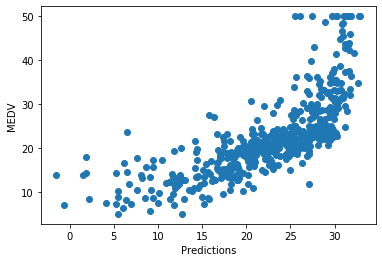

In [25]:
# plot predicted vs real
plt.scatter(x=pred, y=boston['MEDV'])
plt.xlabel('Predictions')
plt.ylabel('MEDV')

Text(0.5, 0, 'LSTAT')

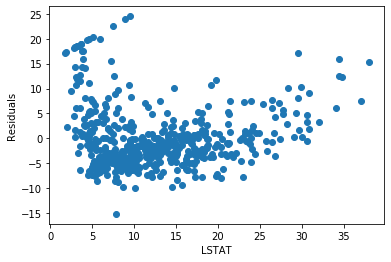

In [26]:
plt.scatter(y=error, x=boston['LSTAT'])
plt.ylabel('Residuals')
plt.xlabel('LSTAT')

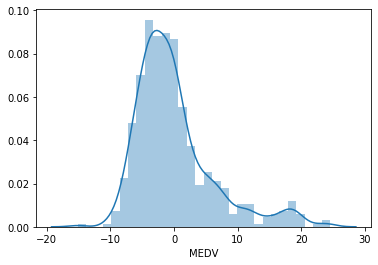

In [27]:
sns.distplot(error, bins=30)

The residuals are not centered around zero, and the distribution is not totally Gaussian. there is a way it can be improved

In [28]:
linreg = LinearRegression()

Text(0, 0.5, 'MEDV')

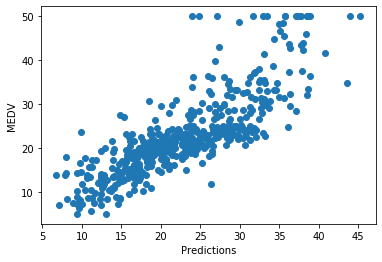

In [29]:
# model ftting
linreg.fit(np.log(boston['LSTAT']).to_frame(), boston['MEDV'])

# make the predictions
pred = linreg.predict(np.log(boston['LSTAT']).to_frame())

# calculate the residuals
error = boston['MEDV'] - pred

# plot predicted vs real
plt.scatter(x=pred, y=boston['MEDV'])
plt.xlabel('Predictions')
plt.ylabel('MEDV')

The predictions seem a bit better than with the non-transformed variable.

Text(0.5, 0, 'LSTAT')

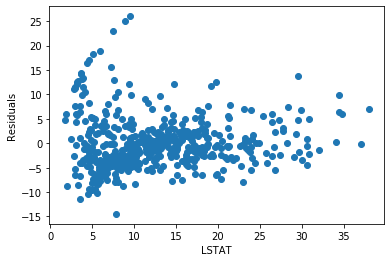

In [30]:
plt.scatter(y=error, x=boston['LSTAT'])
plt.ylabel('Residuals')
plt.xlabel('LSTAT')

The residuals are more centered around zero and more homogeneously distributed across the values of x.

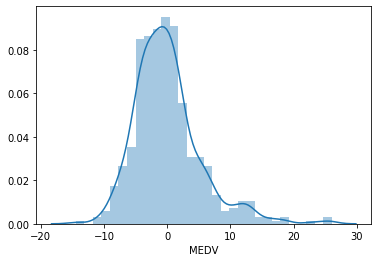

In [31]:
sns.distplot(error, bins=30)

The histogram looks more Gaussian, and the peak towards 20 has now disappeared. We can see how a variable transformation improved the fit and helped meet the linear model assumption of linearity. 

## work on Multicolinearity


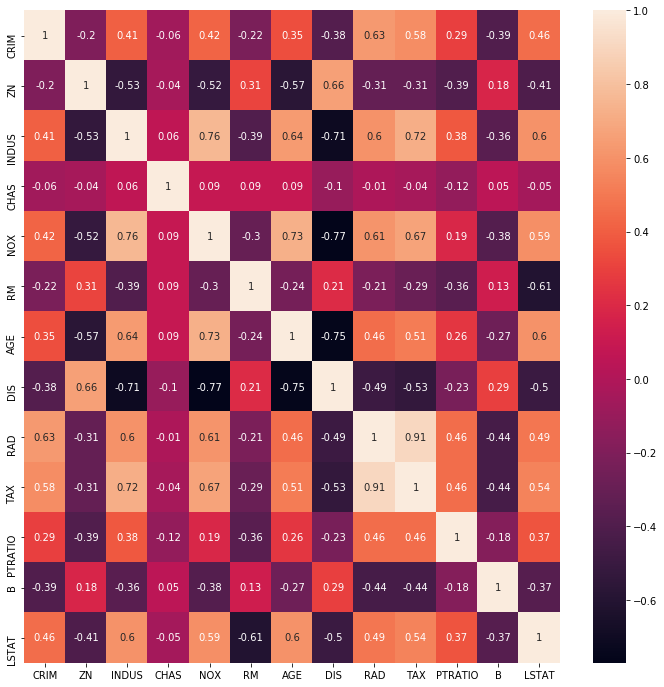

In [32]:
correlation_matrix = boston[features].corr().round(2)

figure = plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True)

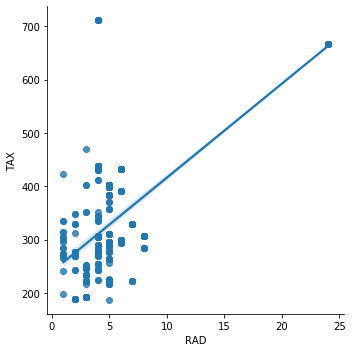

In [33]:
sns.lmplot(x="RAD", y="TAX", data=boston, order=1)

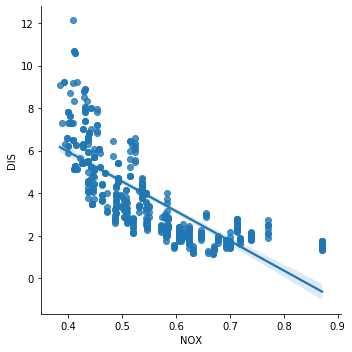

In [34]:
sns.lmplot(x="NOX", y="DIS", data=boston, order=1)

## Normality

Evaluate normality using histograms and Q-Q plots.

### Histograms

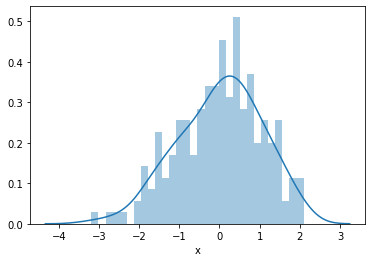

In [35]:
sns.distplot(toy_df['x'], bins=30)

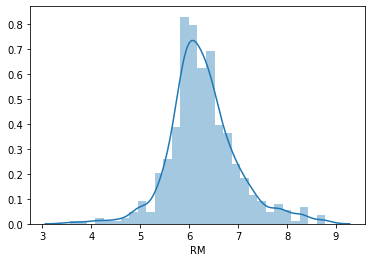

In [36]:
sns.distplot(boston['RM'], bins=30)

This variable seems to follow a Normal distribution. meet assumption.

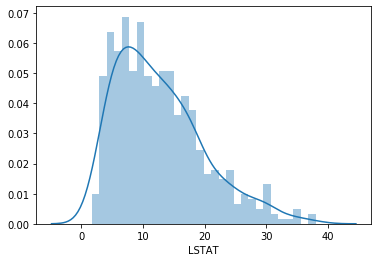

In [37]:
sns.distplot(boston['LSTAT'], bins=30)

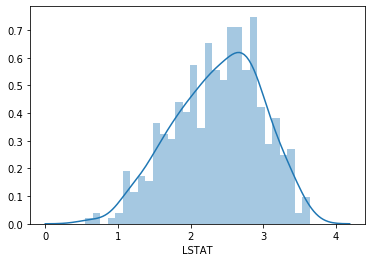

In [38]:
# histogram of the log-transformed LSTAT for comparison
sns.distplot(np.log(boston['LSTAT']), bins=30)

### Q-Q plots


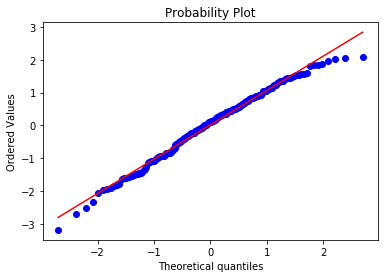

In [39]:
stats.probplot(toy_df['x'], dist="norm", plot=pylab)
pylab.show()